In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if "Processed Data" in dirname:
            print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/cartripsdatamining/TripData/__MACOSX/Processed Data/._readme.rtf
/kaggle/input/cartripsdatamining/TripData/Processed Data/fileID21_ProcessedTripData.csv
/kaggle/input/cartripsdatamining/TripData/Processed Data/fileID23_ProcessedTripData.csv
/kaggle/input/cartripsdatamining/TripData/Processed Data/fileID34_ProcessedTripData.csv
/kaggle/input/cartripsdatamining/TripData/Processed Data/fileID19_ProcessedTripData.csv
/kaggle/input/cartripsdatamining/TripData/Processed Data/fileID30_ProcessedTripData.csv
/kaggle/input/cartripsdatamining/TripData/Processed Data/fileID27_ProcessedTripData.csv
/kaggle/input/cartripsdatamining/TripData/Processed Data/fileID12_ProcessedTripData.csv
/kaggle/input/cartripsdatamining/TripData/Processed Data/fileID20_ProcessedTripData.csv
/kaggle/input/cartripsdatamining/TripData/Processed Data/fileID33_ProcessedTripData.csv
/kaggle/input/cartripsdatamining/TripData/Processed Data/fileID22_ProcessedTripData.csv
/kaggle/input/cartripsdatamining/TripData

In [34]:
df=pd.DataFrame()
for no in range(10,29):
    temp=pd.read_csv("/kaggle/input/cartripsdatamining/TripData/Processed Data/fileID"+str(no)+"_ProcessedTripData.csv",header= None)
    df=df.append(temp)

In [35]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.022,0.0,0,0.0,0.0,0.0,0.051337,-0.0,0,3,0,2,6,0,9,5,3
1,0.033,0.0,0,0.0,0.0,0.0,0.052761,-0.0,0,3,0,2,6,0,9,5,3
2,0.038,0.0,0,0.0,0.0,0.0,0.054212,-0.0,0,3,0,2,6,0,9,5,3
3,0.048,0.0,0,0.0,0.0,0.0,0.055728,-0.0,0,3,0,2,6,0,9,5,3
4,0.058,0.0,0,0.0,0.0,0.0,0.057125,-0.0,0,3,0,2,6,0,9,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193746,1937.500,0.0,0,0.0,0.0,0.0,-0.000000,-0.0,0,3,0,0,4,0,10,6,4
193747,1937.500,0.0,0,0.0,0.0,0.0,-0.000000,0.0,0,3,0,0,4,0,10,6,4
193748,1937.500,0.0,0,0.0,0.0,0.0,-0.000000,-0.0,0,3,0,0,4,0,10,6,4
193749,1937.600,0.0,0,0.0,0.0,0.0,-0.000000,-0.0,0,3,0,0,4,0,10,6,4


Data Labelling and Identification

In [36]:
df.columns=['Time','Vehicle Speed','SHIFT','Engine Load','Total Acceleration','Engine RPM','Pitch','Lateral Acceleration','Passenger Count','Car Load','AC Status','Window Opening','Radio Volume','Rain Intensity','Visibility','Driver Wellbeing','Driver Rush']

Deleting Unncessary Features

In [37]:
df=df.drop(['Time','Engine Load','Total Acceleration','Pitch','Lateral Acceleration','Passenger Count','Car Load','AC Status','Window Opening','Radio Volume','Rain Intensity','Visibility','Driver Wellbeing','Driver Rush'],axis=1)

Deleting Rows where the Gear is in Neutral Position

In [38]:
newdf = df[df.SHIFT != 0]
newdf = newdf.reset_index(drop=True)
df=newdf

In [39]:
df.describe()

,Vehicle Speed,SHIFT,Engine RPM
count,1.458536e+06,1.458536e+06,1.458536e+06
mean,9.215598e+00,2.731734e+00,1.905729e+03
std,3.855273e+00,9.663127e-01,5.236337e+02
min,1.333100e+00,1.000000e+00,8.000200e+02
25%,6.386600e+00,2.000000e+00,1.567500e+03
50%,9.204800e+00,3.000000e+00,1.850500e+03
75%,1.189600e+01,3.000000e+00,2.193100e+03
max,2.645100e+01,5.000000e+00,5.680800e+03


Scatter Plot Analysis

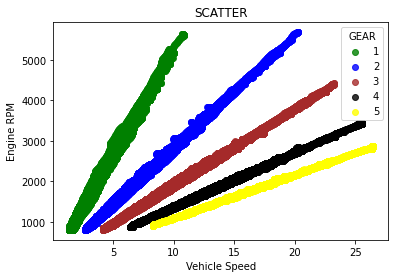

In [40]:
import matplotlib.pyplot as plt
count=1
x="Vehicle Speed"
y="Engine RPM"
colors=['red','green','blue','brown','black','yellow','orange']

for i in range(1,6):
    plt.scatter(df[x][df.SHIFT==i],df[y][df.SHIFT==i],c=colors[i],label=i,alpha=0.8)

plt.gca().update(dict(title='SCATTER', xlabel=x, ylabel=y,))
plt.legend(title='GEAR')
plt.show()

Transfering the label feature towards the end.

In [41]:
temp=df.SHIFT
df=df.drop("SHIFT",axis=1)
df.insert(len(df.columns),"SHIFT",temp)
df

,Vehicle Speed,Engine RPM,SHIFT
0,2.7742,1306.50,1
1,2.7681,1308.80,1
2,2.7610,1311.10,1
3,2.7528,1313.60,1
4,2.7481,1316.10,1
...,...,...,...
1458531,1.7051,845.15,1
1458532,1.7054,844.93,1
1458533,1.7051,844.71,1
1458534,1.7049,844.48,1


Separating data from the labels.

In [42]:
X = df[df.columns[:-1]]
y = df.SHIFT

Splitting the data to test and train data

In [43]:
x_train, x_test, y_train, y_test=train_test_split(X, y, train_size=1093902, test_size=364634, random_state=0)

Finding all models to determine optimum value for K

i=1
n_neighbors=[]
while (i<40):
    n_neighbors.append(i)
    i+=2
print(n_neighbors)
modellist=[]

for j in n_neighbors:
    model = KNeighborsClassifier(n_neighbors=j)
    model.fit(x_train, y_train)
    modellist.append(model)
scorelist=[]
knnlist = modellist
for k in range(len(n_neighbors)):
    scorelist.append(knnlist[k].score(x_test, y_test))
kdf=pd.DataFrame(scorelist,n_neighbors)
kdf.plot.line()

Maximum accuracy is at k=1 with Accuracy at 99.9989%

In [44]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train, y_train)
accuracy=model.score(x_test, y_test)
print("Model Accuracy : "+str(accuracy*100)+" %")

Model Accuracy : 99.99890300959318 %


Interactive Console for Prediction

In [ ]:
speed=input("Enter Current Speed : ")
speed=float(speed)/1.609
rpm=input("Enter Current RPM : ")
test=pd.DataFrame([speed,rpm])
predictions=model.predict(test.values.reshape(1, -1))
print("Predicted Gear State : "+str(int(predictions)))